# Project: Analyzing Macbeth

## Introduction
Now we're going to do some rudimentary analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists and dictionaries, conditionals, visualizing data, and thinking analytically about data.

## Objectives
You will be able to:
* Apply string methods to make changes to a string
* Use a `for` loop to iterate over a collection
* Assign values in a dictionary

## Getting the Data
Here we start by importing a Python package called `requests`. We'll use it to pull the transcript of Macbeth from the [Project Gutenberg](https://www.gutenberg.org/) website. We'll also preview a few details about what is now stored in the variable `macbeth`. As you can see, it's a string with 120,253 characters - the first 500 of which are printed below. 

In [2]:
import requests
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

print(type(macbeth))
print(len(macbeth))

<class 'str'>
120253


## Reduce the string to the text of the play itself.
It looks like the first words of the text of the play are "Actus Primus." so lets make a variable `play` contaning the body of the play with no frontmatter.

In [3]:
start = macbeth.find('Actus Primus.')
play = macbeth[start:]

## Making a dictionary containing acts
Actus primus referes to the first act of the play. Let's see if we can make a dictionary containing the text of each act.

In [4]:
def find_start_of_next_act(play):
    return play.find('Actus', 1)
   
def get_acts(play):
    acts = {}
    act_count = 1
    start_of_next_act = 0
    while start_of_next_act >= 0:
        start_of_next_act = find_start_of_next_act(play)
        act_key = 'act{}'.format(act_count)
        acts[act_key] = play[:start_of_next_act]
        act_count += 1
        play = play[start_of_next_act:]
    return acts
    

In [5]:
acts = get_acts(play)
print(acts['act2'])

Actus Secundus. Scena Prima.

Enter Banquo, and Fleance, with a Torch before him.

  Banq. How goes the Night, Boy?
  Fleance. The Moone is downe: I haue not heard the
Clock

   Banq. And she goes downe at Twelue

   Fleance. I take't, 'tis later, Sir

   Banq. Hold, take my Sword:
There's Husbandry in Heauen,
Their Candles are all out: take thee that too.
A heauie Summons lyes like Lead vpon me,
And yet I would not sleepe:
Mercifull Powers, restraine in me the cursed thoughts
That Nature giues way to in repose.
Enter Macbeth, and a Seruant with a Torch.

Giue me my Sword: who's there?
  Macb. A Friend

   Banq. What Sir, not yet at rest? the King's a bed.
He hath beene in vnusuall Pleasure,
And sent forth great Largesse to your Offices.
This Diamond he greetes your Wife withall,
By the name of most kind Hostesse,
And shut vp in measurelesse content

   Mac. Being vnprepar'd,
Our will became the seruant to defect,
Which else should free haue wrought

   Banq. All's well.
I dreamt last 

## Split each act into its title and body
It would be nice to return a dictionary with the title of the act and the body of the act in a dictionary. Let's see if we can make that happen. 

In [8]:
def find_start_of_next_act(play):
    return play.find('Actus', 1)

def find_start_of_next_scene(act_body):
    return act_body.find('Scoena', 1)

def find_end_of_title(act):
    end_of_title = act.find('.') + 1
    return end_of_title

def get_act_title(act):
    end_of_title =  find_end_of_title(act)
    title = act[:end_of_title]
    return title

def get_act_body(act):
    end_of_title = find_end_of_title(act)
    body = act[end_of_title:]
    return body
    
def get_acts(play):
    acts = {}
    act_count = 1
    start_of_next_act = 0
    while start_of_next_act >= 0:
        start_of_next_act = find_start_of_next_act(play)
        act_key = 'act{}'.format(act_count)
        act = play[:start_of_next_act]
        acts[act_key] = { 'title': get_act_title(act),
                            'body': get_act_body(act)
                          }
        act_count += 1
        play = play[start_of_next_act:]
    return acts

In [9]:
acts = get_acts(play)
print(acts['act1']['body'])

 Scoena Prima.

Thunder and Lightning. Enter three Witches.

  1. When shall we three meet againe?
In Thunder, Lightning, or in Raine?
  2. When the Hurley-burley's done,
When the Battaile's lost, and wonne

   3. That will be ere the set of Sunne

   1. Where the place?
  2. Vpon the Heath

   3. There to meet with Macbeth

   1. I come, Gray-Malkin

   All. Padock calls anon: faire is foule, and foule is faire,
Houer through the fogge and filthie ayre.

Exeunt.


Scena Secunda.

Alarum within. Enter King, Malcome, Donalbaine, Lenox, with
attendants, meeting a bleeding Captaine.

  King. What bloody man is that? he can report,
As seemeth by his plight, of the Reuolt
The newest state

   Mal. This is the Serieant,
Who like a good and hardie Souldier fought
'Gainst my Captiuitie: Haile braue friend;
Say to the King, the knowledge of the Broyle,
As thou didst leaue it

   Cap. Doubtfull it stood,
As two spent Swimmers, that doe cling together,
And choake their Art: The mercilesse Macdonw

## Split the body of each act into scenes
It looks like each act is separated into scenes where each scene starts with the word "Scoena". Let's see if we can split the body of each act up into scenes. This is basically what we just did above applied to the body of each act so we should try to abstract the code above so that we can reuse it on scenes.

In [27]:
def section_end_index(string, titleString):
    """
    This function expects a string with sections that begin with a title in the 
    format "<titleString><unknown text>.". It finds the index of the end of the
    first section in the string.
    """
    index = string.find(titleString,1)
    if index > 0:
        return index
    else:
        return len(string)
        
    
def test_section_end_index():
    testTitle = 'Title'
    testSection1 = 'Title 1. Just some text nothing to see here. '
    testSection2 = 'Title 2. Even more text. '
    testString = testSection1+testSection2
    start_of_next_section = section_end_index(testString, 'Title')
    return testSection1 == testString[:start_of_next_section]

test_section_end_index()

True

In [28]:
def title_body_dict(string, titleString):
    """
    This function takes a string that begins with a title with the format "<titleString><unknown text>.". 
    We refer to any text after the title as the body of the string.This function returns the title and 
    the body of the string. This function returns a dictionary with keys ['title', 'body']. If string 
    does not start with the titleString, it returns None.
    """
    if string.find(titleString) == 0:
        split_at = string.find('.') + 1
        title_body_dict = dict()
        title_body_dict['title'] = string[:split_at]
        title_body_dict['body'] = string[split_at:]
        return title_body_dict
        
def test_title_body_dict():
    testTitleString = 'Title'
    testTitle = '{} 1.'.format(testTitleString)
    testBody = ' Just some text nothing to see here. Still nothing interesting. '
    testString = testTitle+testBody
    titleBodyDict = title_body_dict(testString, testTitle)
    return titleBodyDict['title'] == testTitle and titleBodyDict['body'] == testBody

test_title_body_dict()

True

In [30]:
def decompose_string(string, titleString):
    """
    This function takes a string and decomposes it into a list of sections in the form of title and body 
    dictionaries where each section of text begins with a title with the format "<titleString><unknown text>.". 
    """
    sections = []
    while len(string) > 0:
        sectionEnd = section_end_index(string, titleString)
        sectionString = string[:sectionEnd]
        sections.append(title_body_dict(sectionString, titleString))
        string = string[sectionEnd:]
    return sections

def test_decompose_string():
    import lorem
    testTitleString = 'Title'
    testTitle1 = '{} one.'.format(testTitleString)
    testBody1 = 'Body one.' #lorem.paragraph()
    testSection1 = testTitle1 + testBody1
    testTitle2 = '{} two.'.format(testTitleString)
    testBody2 = 'Body two.'#lorem.paragraph()
    testSection2 = testTitle2 + testBody2
    testString = testSection1 + testSection2
    sectionList = decompose_string(testString, testTitleString)
    return ( sectionList[0]['title'] == testTitle1 
             and sectionList[1]['title'] == testTitle2 
             and sectionList[0]['body'] == testBody1
             and sectionList[1]['body'] == testBody2
           )
test_decompose_string()

True

In [38]:
def get_acts(play):
    acts = decompose_string(string = play, titleString = 'Actus')
    return acts

In [37]:
acts = get_acts(play)

In [ ]:
def     

## Your Task

Your task is to create a bar graph of the 25 most common words in Shakespeare's Macbeth.  


A common Python programming pattern to count objects, produce histograms, or update statistics is to make calls to a dictionary as you iterate through a list. For example, given a list of words, you can create a dictionary to store counts and then iterate through the list of words, checking how many times each word has appeared using your dictionary, and updating the dictionary count now that you've seen that word again. The `.get()` dictionary method is very useful in doing this. Read the docstring for the `.get()` method and use it along with the pseudocode below to create a bar graph of the 25 most common words from the transcript of Macbeth which has been loaded into the variable 'macbeth'. Be sure to include a title and appropriate labels for your graph.

To get the 25 *most common* words, you will have to sort your counts. If you are not super sure how to do this, checkout out the [Sorting HOW TO](https://docs.python.org/3/howto/sorting.html) Python documentation. Part of being a data scientist is figuring out how to do tasks that you may not have done before. Remember, in these situations, Google is your friend!

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Your code here
words = macbeth.split(' ')
word_counts = dict()
for word in words:
    if word in list(word_counts.keys()):
        word_counts[word] +=1
    else:
        word_counts[word] = 1
Pseudo-code outline

# Split the transcript into words
# Create a dictionary
# Iterate through the text of Macbeth
# Update word counts
# Sort words by counts in descending order
# Create Bar Graph
# Include descriptive titles and labels

SyntaxError: invalid syntax (<ipython-input-38-5008aa9d228c>, line 13)

In [39]:
sorted_word_counts = {k: v for k,v in sorted(word_counts.items(), key=lambda item: item[1], reverse = True )}
top25 = list(sorted_word_counts.items())[1:26]

In [40]:
x = []
y = []
for pair in top25:
    x.append(pair[0])
    y.append(pair[1])

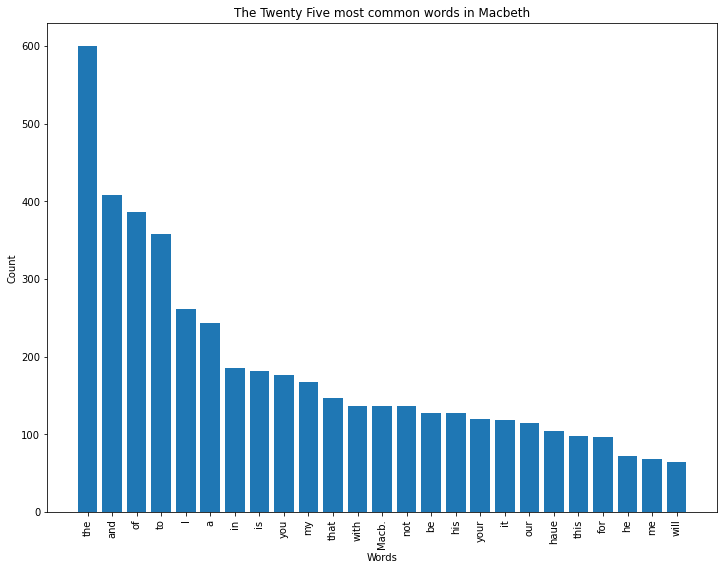

In [41]:
plt.figure(figsize=(12,9))
plt.bar(x,y)
plt.xticks(x, x, rotation = 75)
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("The Twenty Five most common words in Macbeth")
plt.show()

## Level Up (Optional)
This project should take you about an hour and a half to complete. If you're done much more quickly than that and are not behind in the course, feel free to deepen your knowledge by completing any or all of the following tasks until you run out of time:
* Create a list of top characters by mentions of their names 
* Split the text by which character is talking
* Create subgraphs of the most common words by character
* Reduce the string to the text of the play itself. (Remove any initial notes, forward, introduction, appendix, etc.)
* Come up with some other fun analyses of the text!

## Summary
Congratulations! You've got some extra practice combining various data types into useful programming patterns and done an initial analysis of a classic text!